In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
with open('blochain_data.json', 'r') as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,hash,height,mainchain,previous,bits,nonce,size,merkle,outputs,work,transactionCount
0,00000000000000000001fc572a26234f8387cfcf7b2001...,841340,True,000000000000000000029462f16a7484dde14cb73a4a92...,386085339,2201866013,1492010,675d7a738cd211be1b1503593b08d167bef68c1a10218d...,800663023774,3.678423e+28,3121
1,000000000000000000029462f16a7484dde14cb73a4a92...,841339,True,000000000000000000011125b612fdc1277f4aa08bb852...,386085339,3459638504,1565250,47f37fd05c8a5aae2835575cbb2275c207c53eb46b6a53...,603073967384,3.678385e+28,4137
2,000000000000000000011125b612fdc1277f4aa08bb852...,841338,True,00000000000000000002391e866cf6fd5f59c570b960a1...,386085339,618193646,1921324,31c30ca7519e6a6057f1d1b881168c9afd18f9e68b5559...,376655518055,3.678347e+28,3428
3,00000000000000000002391e866cf6fd5f59c570b960a1...,841337,True,00000000000000000000f3a4222342348a9b8cf3fb4894...,386085339,480560799,1775080,6a820f27ecd4b1107342996d6137e028fe40d11e4a8070...,703166480972,3.678310e+28,3271
4,00000000000000000000f3a4222342348a9b8cf3fb4894...,841336,True,0000000000000000000138adff3fea35f5a3916f395d7c...,386085339,3713677982,1539705,17376ba18d30cc962fd224b36421381277663f92ef0857...,222645025057,3.678272e+28,4243


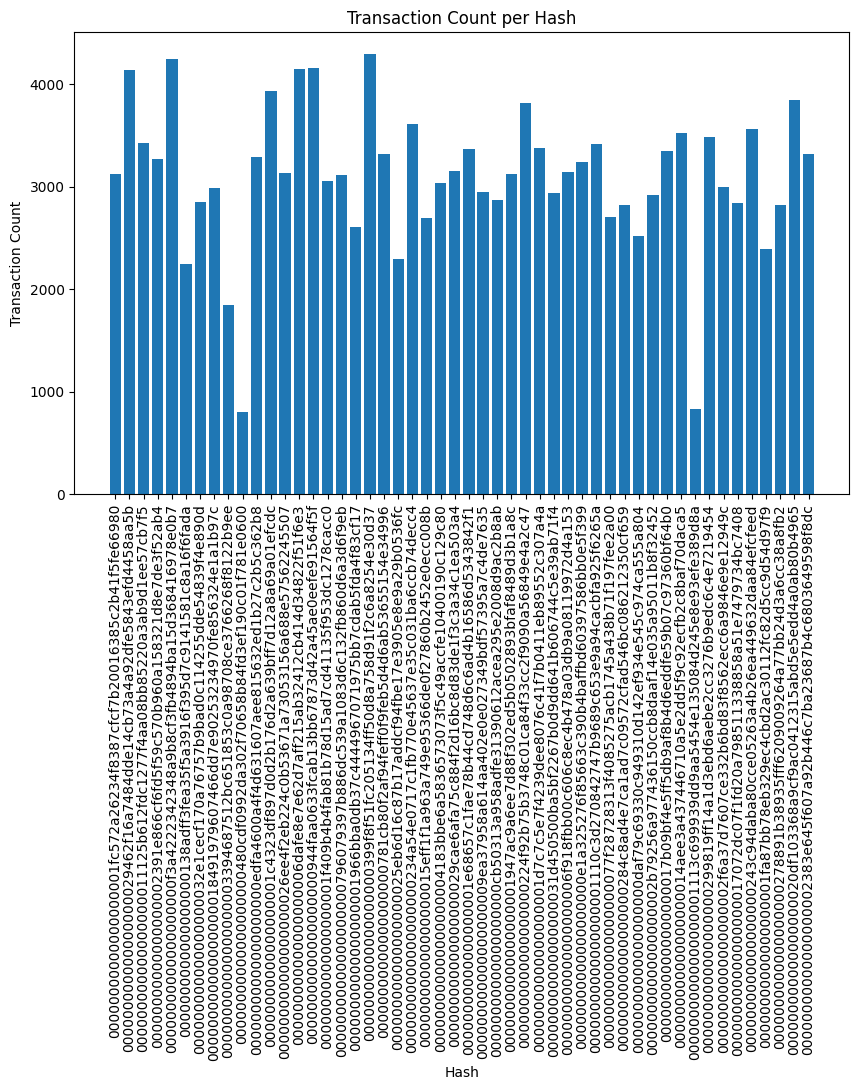

In [5]:
# Plot a bar graph of the transaction count
plt.figure(figsize=(10,6))  # Increase the size of the plot
plt.bar(df['hash'], df['transactionCount'])
plt.xlabel('Hash')
plt.ylabel('Transaction Count')
plt.title('Transaction Count per Hash')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

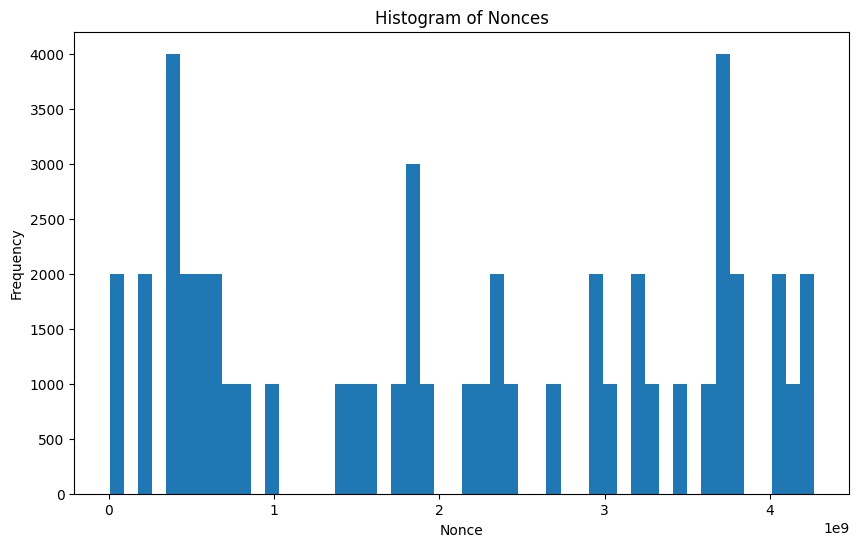

In [6]:
# Histogram of Nonces
plt.figure(figsize=(10,6))
plt.hist(df['nonce'], bins=50)
plt.xlabel('Nonce')
plt.ylabel('Frequency')
plt.title('Histogram of Nonces')
plt.show()

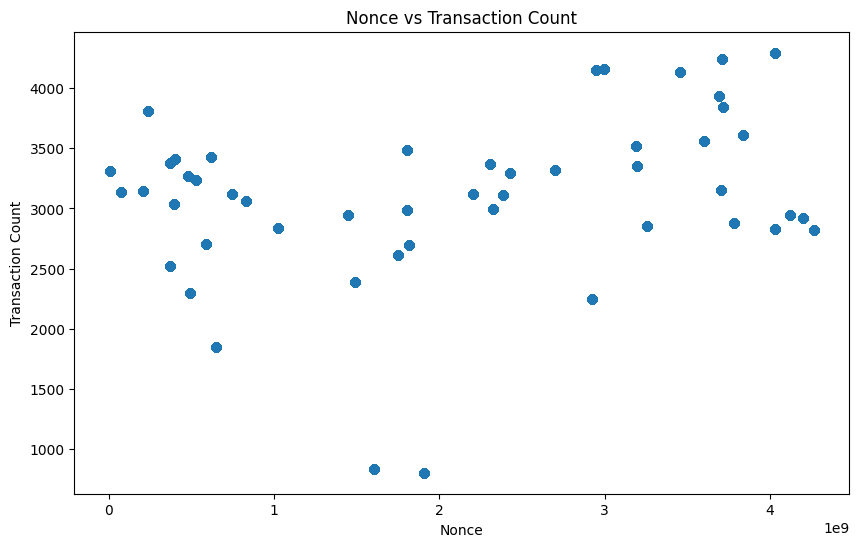

In [7]:
# Scatter Plot of Nonce vs Transaction Count
plt.figure(figsize=(10,6))
plt.scatter(df['nonce'], df['transactionCount'])
plt.xlabel('Nonce')
plt.ylabel('Transaction Count')
plt.title('Nonce vs Transaction Count')
plt.show()

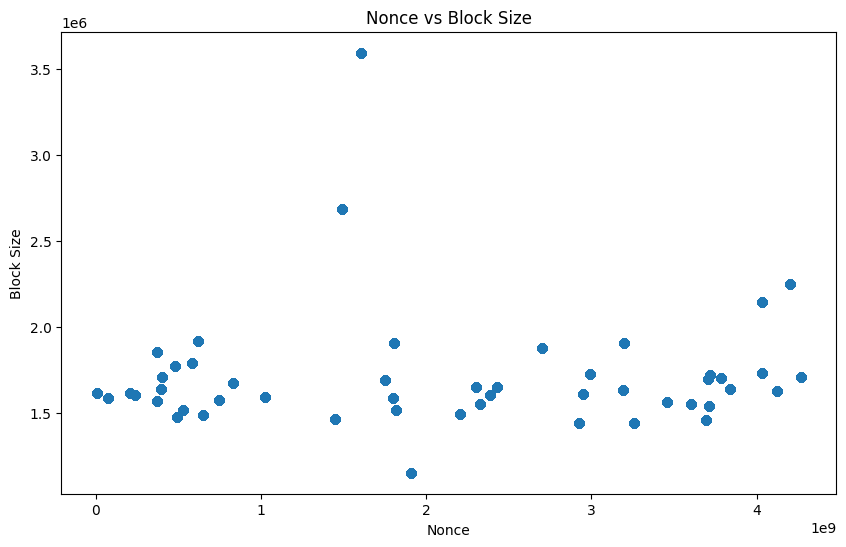

In [8]:
# Scatter Plot of Nonce vs Block Size
plt.figure(figsize=(10,6))
plt.scatter(df['nonce'], df['size'])
plt.xlabel('Nonce')
plt.ylabel('Block Size')
plt.title('Nonce vs Block Size')
plt.show()

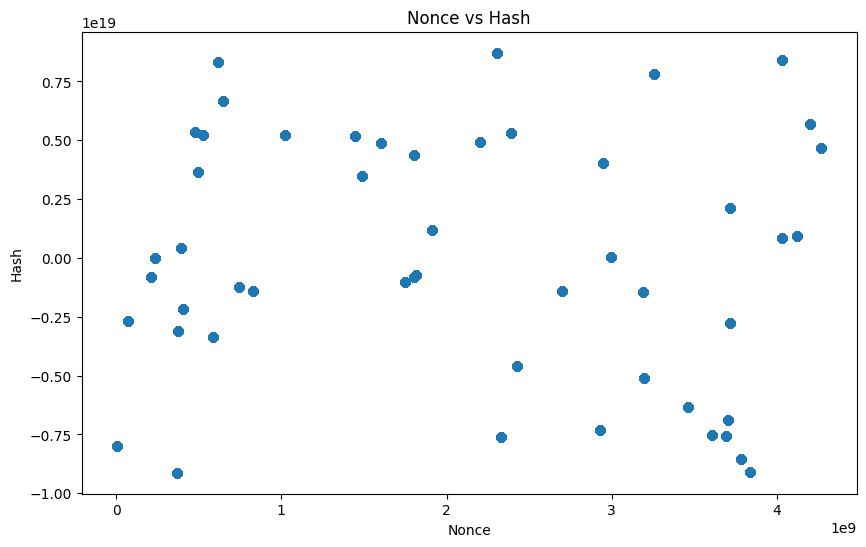

In [9]:
# Convert hash to numerical form
df['hash_num'] = df['hash'].apply(hash)

# Scatter Plot of Nonce vs Hash
plt.figure(figsize=(10,6))
plt.scatter(df['nonce'], df['hash_num'])
plt.xlabel('Nonce')
plt.ylabel('Hash')
plt.title('Nonce vs Hash')
plt.show()

In [10]:
# Define the number of bins
num_bins = 10

# Create bins for the nonce values
df['nonce_bins'] = pd.cut(df['nonce'], bins=num_bins)

# Count the frequency of each bin
nonce_frequency = df['nonce_bins'].value_counts()

# Find the bin with the highest frequency
most_frequent_bin = nonce_frequency.idxmax()

print(f"The range of nonces that occurs most frequently is: {most_frequent_bin}")

The range of nonces that occurs most frequently is: (530962.911, 431197799.9]


In [ ]:
# Define the number of bins
num_bins = 100

# Create bins for the nonce values
df['nonce_bins'] = pd.cut(df['nonce'], bins=num_bins)

# Count the frequency of each bin
nonce_frequency = df['nonce_bins'].value_counts()

# Find the bin with the highest frequency
most_frequent_bin = nonce_frequency.idxmax()

print(f"The range of nonces that occurs most frequently is: {most_frequent_bin}")

# Plot the frequency distribution of the nonce values
plt.figure(figsize=(10,6))
nonce_frequency.sort_index().plot(kind='bar')
plt.xlabel('Nonce Range')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Nonces')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()